In [1]:
# install datasets
!pip install datasets

# Let's import the library. We typically only need at most two methods:
from datasets import list_datasets, load_dataset

from pprint import pprint

# Downloading and loading a dataset
dataset = load_dataset('mwritescode/slither-audited-smart-contracts', 'big-multilabel')

train_data = dataset["train"]
validation_data = dataset["validation"]
test_data = dataset["test"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.9 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/4 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/79641 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/15972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10861 [00:00<?, ? examples/s]

In [3]:
import pandas as pd

# Print the dimensions of train_data
print("Dimensions of train_data:", train_data.shape)
print("Dimensions of validation_data:", validation_data.shape)
print("Dimensions of test_data:", test_data.shape)

train_df = pd.DataFrame(train_data)



Dimensions of train_data: (79641, 4)
Dimensions of validation_data: (10861, 4)
Dimensions of test_data: (15972, 4)


In [4]:
print(train_df.shape)



(79641, 4)


In [5]:
# Check for duplicates based on the 'source_code' column
duplicates_mask = train_df.duplicated(subset='source_code', keep='first')

# Keep the first occurrence of each duplicate row and remove the rest
train_df = train_df.drop_duplicates(subset='source_code', keep='first')
print(train_df.shape)

(74991, 4)


In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

train_df.to_csv('/content/drive/MyDrive/Practicum/SascDatasets/train_data_source_codes.csv', columns=["source_code", "slither"])

Mounted at /content/drive


In [9]:
train_df = pd.DataFrame(validation_data)
print(train_df.shape)
# Check for duplicates based on the 'source_code' column
duplicates_mask = train_df.duplicated(subset='source_code', keep='first')

# Keep the first occurrence of each duplicate row and remove the rest
train_df = train_df.drop_duplicates(subset='source_code', keep='first')
print(train_df.shape)

(10861, 4)
(10606, 4)


In [10]:
train_df.to_csv('/content/drive/MyDrive/Practicum/SascDatasets/validation_data_source_codes.csv')

In [3]:
# Save source code datasets to drive

import pandas as pd

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def save_to_csv(data, filename, num_rows=None):
    # Extract "source_code" and "slither" columns from the data dictionary
    df = pd.DataFrame(data, columns=["source_code", "slither"])

    # If num_rows is not provided, save all rows
    if num_rows is None:
        df.to_csv(filename, index=False)
    else:
        # Save only the first num_rows rows
        df.head(num_rows).to_csv(filename, index=False)

# Assuming train_data, validation_data, and test_data are dictionaries
# containing the data you want to save to CSV files

# Save first half of train_data to CSV with only "source_code" and "slither" columns
# num_rows_train = len(train_data) // 2
save_to_csv(train_data, '/content/drive/MyDrive/Practicum/SascDatasets/train_data.csv')

# Save first half of validation_data to CSV with only "source_code" and "slither" columns
# num_rows_validation = len(validation_data) // 2
save_to_csv(validation_data, '/content/drive/MyDrive/Practicum/SascDatasets/validation_data.csv')

# Save first half of test_data to CSV with only "source_code" and "slither" columns
# num_rows_test = len(test_data) // 2
save_to_csv(test_data, '/content/drive/MyDrive/Practicum/SascDatasets/test_data.csv')

Mounted at /content/drive


In [2]:
import pandas as pd

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/Practicum/SascDatasets/train_data.csv')
print(train_df.iloc[0:2])
print(train_df.shape)

# val_df = pd.read_csv('/content/drive/MyDrive/Practicum/SascDatasets/validation_data.csv')
# print(val_df.iloc[0:2])
# print(val_df.shape)

# test_df = pd.read_csv('/content/drive/MyDrive/Practicum/SascDatasets/test_data.csv')
# print(test_df.iloc[0:2])
# print(test_df.shape)

MessageError: ignored

In [ ]:
# Print the first 5 lines of the train_data
for i in range(5):
    print(validation_data[i]['source_code'])

In [3]:
import sys
import pprint

def parse_solidity_code(source_code):
    try:
        ast = parser.parse(source_code)
        return ast
    except Exception as e:
        print("Error parsing Solidity code:", e)
        return None

In [10]:
!apt-get install -y -qq git
!git clone https://github.com/ConsenSys/python-solidity-parser.git
%ls
%cd python-solidity-parser
%ls
!pip install .
from solidity_parser import parser

import sys
import pprint

def parse_solidity_code(source_code):
    try:
        ast = parser.parse(source_code)
        return ast
    except Exception as e:
        print("Error parsing Solidity code:", e)
        return None

Cloning into 'python-solidity-parser'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 198 (delta 55), reused 49 (delta 49), pack-reused 138
Receiving objects: 100% (198/198), 270.51 KiB | 8.45 MiB/s, done.
Resolving deltas: 100% (103/103), done.
drive/  python-solidity-parser/  sample_data/
/content/python-solidity-parser
README.md         samples/  setup.py          solidity_parser/
requirements.txt  scripts/  solidity-antlr4/
Processing /content/python-solidity-parser
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for solidity-parser: filename=solidity_parser-0.1.1-py3-none-any.whl size=67339 sha256=7f88263d4ab67cc97da9906102f047942ea1e6ef75e7ea3e2f1841331e28d7a4
  Stored in directory: /root/.cache/pip/wheels/6c/04/a4/9bab35dd96f0494763c278dbe3f664d449

In [6]:
%ls
%cd python-solidity-parser

README.md         samples/  setup.py          solidity_parser/
requirements.txt  scripts/  solidity-antlr4/
[Errno 2] No such file or directory: 'python-solidity-parser'
/content/python-solidity-parser


In [15]:
solidity_source_code = train_data[4]['source_code']
# print(solidity_source_code)

sourceUnit = parse_solidity_code(solidity_source_code)

sourceUnitObject = parser.objectify(sourceUnit)
sourceUnitObject.contracts.keys()  # get all contract names
sourceUnitObject.contracts["CarefulMath"].functions['addUInt'].config/  # get all functions in contract: "contractName"

SyntaxError: ignored

In [ ]:
pprint.pprint(sourceUnit)

In [ ]:
source_code = '''
pragma solidity ^0.8.0;

contract MyContract {
    uint256 private myVariable;

    constructor() {
        myVariable = 10;
    }

    function getVariable() public view returns (uint256) {
        return myVariable;
    }
}
'''

# Step 1: Parse the source code
ast = parse_solidity_code(source_code)
pprint.pprint(ast)

In [23]:
source_code = '''
// SPDX-License-Identifier: UNLICENSED
pragma solidity ^0.8.9;

contract DappDoneDeal {
    // string public name;
    string[] allowedCategories = ["Clothing & Jewelry", "Electronics & Gadgets", "Toys & Gaming"];

    uint256 public productCount;

    // Store products by ID
    mapping(uint256 => Product) public products;

    // For each buyer store a count of their purchases
    mapping(address => uint256) public purchaseCounter;

    // For each buyer store a list of their purchases
    mapping(address => mapping(uint256 => Purchase)) public purchases;


    event ProductListing(string name, uint256 price);
    event BuyEvent(address buyer, uint256 purchaseId, uint256 productId);

    modifier onlySeller(address _addr, uint256 _productId) {
        require(_addr != address(0), "Address must not be zero");
        address productLister = products[_productId].seller;
        require(_addr == productLister, "Address withdrawing must be the seller of product being bought");
        _;
    }

    // Model a Product
    struct Product {
        uint256 id;
        string name;
        string category;
        uint256 price;
        bool sold;
        address seller;
        string ipfsImage;
        string description;
        string country;
    }

    // Model a purchase
    struct Purchase {
        uint256 timestamp;
        Product product;
        address buyer;
    }

    constructor() {
        productCount = 0;
    }

    function listNewProduct (
        string memory _name,
        string memory _category,
        uint256 _price,
        string memory _ipfsImage,
        string memory _description,
        string memory _country) public {

            require(bytes(_name).length > 0, "Cannot provide an empty name");
            require(bytes(_category).length > 0 && validateCategory(_category), "Invalid category name provided");

            productCount++;
            products[productCount] = Product(productCount, _name, _category, _price, false, msg.sender, _ipfsImage, _description, _country);

            // Emit product listing event
            emit ProductListing(_name, _price);
    }

    function validateCategory(string memory category) private view returns(bool) {
        for (uint i = 0; i < allowedCategories.length; i++) {
            if (keccak256(bytes(allowedCategories[i])) == keccak256(bytes(category))) {
                return true;
            }
        }
        return false;
    }

    function buyProduct(uint256 _id) public payable {

        // Fetch product by _id
        Product memory product = products[_id];

        // Buyer must send enough eth to buy product
        require(msg.value >= product.price);

        // Require that product isn't already sold
        require(!product.sold);

        // Create purchase
        Purchase memory purchase = Purchase(block.timestamp, product, msg.sender);

        // increment the purchase count for the buyer and then save purchase to buyer
        purchaseCounter[msg.sender]++;
        purchases[msg.sender][purchaseCounter[msg.sender]] = purchase;

        // Transfer ether from buyer to seller
        transferToSeller(product.seller, _id);

        // Set sold variable to true for both product and purchase
        products[_id].sold = true;
        purchases[msg.sender][purchaseCounter[msg.sender]].product.sold = true;

        // Emit buying event
        emit BuyEvent(msg.sender, purchaseCounter[msg.sender], product.id);

    }

    function transferToSeller(address _seller, uint256 _productId) private onlySeller(_seller, _productId) {
        (bool success, ) = _seller.call{value: address(this).balance}("");
        require(success);
    }

}
'''

start = 1000
index = 100
# Step 1: Parse the source code
for i in range(start, start+index):
    ast = parse_solidity_code(validation_data[index]['source_code'])
    # Step 2: Serialize the AST
    serialized_ast = serialize_ast(ast)
    # print(validation_data[index]['slither'])
    # pprint.pprint(ast, width=10000, sort_dicts=False)

In [7]:
pprint.pprint(ast, width=10, sort_dicts=False)

{'type': 'SourceUnit',
 'children': [{'type': 'PragmaDirective',
               'name': 'solidity',
               'value': '^0.8.9'},
              {'type': 'ContractDefinition',
               'name': 'DappDoneDeal',
               'baseContracts': [],
               'subNodes': [{'type': 'StateVariableDeclaration',
                             'variables': [{'type': 'VariableDeclaration',
                                            'typeName': {'type': 'ArrayTypeName',
                                                         'baseTypeName': {'type': 'ElementaryTypeName',
                                                                          'name': 'string'},
                                                         'length': None},
                                            'name': 'allowedCategories',
                                            'expression': {'type': 'TupleExpression',
                                                           'components': [{'type': 'stringLit

In [24]:
names = []
def find_nodes_by_name(ast, target_name):
    result_nodes = []

    def traverse(node):
        if isinstance(node, dict):
            if 'name' in node:
                names.append(node['name'])

            if 'type' in node and node['type'] == target_name:
                result_nodes.append(node)

            for key, value in node.items():
                if isinstance(value, list):
                    for item in value:
                        traverse(item)
                elif isinstance(value, dict):
                    traverse(value)

    traverse(ast)
    return result_nodes

# Find a node with a specific name
target_name = 'FunctionDefinition'
function_nodes = find_nodes_by_name(ast, target_name)

if function_nodes:
    for node in function_nodes:
        print("Node Found:", node)
else:
    print("Node with name", target_name, "not found.")

Node Found: {'type': 'FunctionDefinition', 'name': 'constructor', 'parameters': {'type': 'ParameterList', 'parameters': []}, 'returnParameters': [], 'body': {'type': 'Block', 'statements': [{'type': 'ExpressionStatement', 'expression': {'type': 'BinaryOperation', 'operator': '=', 'left': {'type': 'Identifier', 'name': 'productCount'}, 'right': {'type': 'NumberLiteral', 'number': '0', 'subdenomination': None}}}]}, 'visibility': 'default', 'modifiers': [], 'isConstructor': True, 'isFallback': False, 'isReceive': False, 'stateMutability': None}
Node Found: {'type': 'FunctionDefinition', 'name': 'listNewProduct', 'parameters': {'type': 'ParameterList', 'parameters': [{'type': 'Parameter', 'typeName': {'type': 'ElementaryTypeName', 'name': 'string'}, 'name': '_name', 'storageLocation': 'memory', 'isStateVar': False, 'isIndexed': False}, {'type': 'Parameter', 'typeName': {'type': 'ElementaryTypeName', 'name': 'string'}, 'name': '_category', 'storageLocation': 'memory', 'isStateVar': False, '

In [25]:
def getFunctionNodes():
    # Find a node with a specific name
    target_name = 'FunctionDefinition'
    return find_nodes_by_name(ast, target_name)

In [ ]:
for name in names:
  print(name)

In [18]:
def serialize_ast(node):
    if not isinstance(node, dict):
        return str(node)

    serialized_node = node['type']
    for key, value in node.items():
        if key == 'type':
            continue
        if isinstance(value, list):
            serialized_value = ' '.join(serialize_ast(item) for item in value)
        else:
            serialized_value = serialize_ast(value)
        serialized_node += f' {key} {serialized_value}'

    return serialized_node

def sequential_structure_representation(ast):
    return [serialize_ast(ast)]

In [19]:
sequential_repr = sequential_structure_representation(function_nodes[1])
print(sequential_repr)

['FunctionDefinition name listNewProduct parameters ParameterList parameters Parameter typeName ElementaryTypeName name string name _name storageLocation memory isStateVar False isIndexed False Parameter typeName ElementaryTypeName name string name _category storageLocation memory isStateVar False isIndexed False Parameter typeName ElementaryTypeName name uint256 name _price storageLocation None isStateVar False isIndexed False Parameter typeName ElementaryTypeName name string name _ipfsImage storageLocation memory isStateVar False isIndexed False Parameter typeName ElementaryTypeName name string name _description storageLocation memory isStateVar False isIndexed False Parameter typeName ElementaryTypeName name string name _country storageLocation memory isStateVar False isIndexed False returnParameters  body Block statements ExpressionStatement expression FunctionCall expression Identifier name require arguments BinaryOperation operator > left MemberAccess expression FunctionCall expr

In [ ]:
for key, value in function_nodes[1].items():
  print(f'key = {key}')
  print(f'value = {value}')

In [23]:
serialized_node = []
def sequential_structure_representation(node, keywords):
    if 'type' in node and node['type'] == 'FunctionDefinition':
        for key, value in node.items():
            if key == 'name' and value not in keywords:
                value = 'user_defined'
            if isinstance(value, list):
                serialized_value = ' '.join(sequential_structure_representation(item, keywords) for item in value)
            elif isinstance(value, dict):
                serialized_value = sequential_structure_representation(value, keywords)
            else:
                serialized_value = str(value)
            serialized_node.append(f'{key} {serialized_value}')
    return ' '.join(serialized_node)

# Set of Solidity keywords
solidity_keywords = {
    'uint256', 'string', 'mapping', 'contract', 'function',  # Add other keywords here
}

functionNodes = getFunctionNodes()
for node in functionNodes:
    sequential_structure_representation(node, solidity_keywords)



serialized_ast = sequential_structure_representation(ast, solidity_keywords)

print(serialized_ast)

In [ ]:
import pandas as pd

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

training_output_path = f'/content/drive/MyDrive/Practicum/ASTDataPP/training_ast_sequences_0.csv'

tdf = pd.read_csv(training_output_path)
count = 0
for j in range(0, 4000):
    # Convert the element to string before calculating length
    element = (tdf.iloc[j][0])

    length = len(element)
    if length < 100:
        print(element)
        count += 1

print(f"count = {count}")

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
import pandas as pd
# Load the chunked training data
chunk_path = f'/content/drive/MyDrive/Practicum/ASTDataPP/training_ast_sequences_0.csv'
train_df = pd.read_csv(chunk_path)

# for i in range(1, 11):
#     chunk_path = f'/content/drive/MyDrive/Practicum/ASTDataPP/training_ast_sequences_{i}.csv'
#     chunk_df = pd.read_csv(chunk_path)
#     train_df = pd.concat([train_df, chunk_df], ignore_index=True)

print(train_df.shape)
print(train_df.head(10))

Mounted at /content/drive
(4000, 2)
                                  processed_sequence     labels
0  type FunctionDefinition name XX parameters typ...        [1]
1  type FunctionDefinition name XX parameters typ...  [3, 2, 1]
2  type FunctionDefinition name XX parameters typ...        [4]
3  type FunctionDefinition name XX parameters typ...        [4]
4  type FunctionDefinition name XX parameters typ...     [5, 2]
5  type FunctionDefinition name constructor param...        [4]
6  type FunctionDefinition name XX parameters typ...        [4]
7  type FunctionDefinition name XX parameters typ...        [4]
8  type FunctionDefinition name XX parameters typ...        [4]
9  type FunctionDefinition name XX parameters typ...        [4]


In [38]:
train_df.reset_index(drop=True, inplace=True)  # Reset index

In [14]:
sasc_path = f'/content/drive/MyDrive/Practicum/SascDatasets/train_data.csv'
sasc_df = pd.read_csv(sasc_path)

In [15]:
print(sasc_df.head(3))
print(sasc_df.shape)

                                         source_code    slither
0  pragma solidity 0.5.4;\n\ninterface IERC20 {\n...        [1]
1  pragma solidity 0.6.10;\npragma experimental A...  [3, 2, 1]
2  pragma solidity 0.6.5;\npragma experimental AB...        [4]
(79641, 2)


In [21]:
# Step 1: Parse the source code
ast1 = parse_solidity_code(sasc_df.iloc[34]['source_code'])
print("AST1:")
# function_nodes1 = get_function_nodes(ast1)
# for n in function_nodes1:
#     pprint.pprint(n, width=10000, sort_dicts=False)


ast2 = parse_solidity_code(sasc_df.iloc[110]['source_code'])
print("AST2:")
# function_nodes2 = get_function_nodes(ast2)
# for n in function_nodes2:
#     pprint.pprint(n, width=10000, sort_dicts=False)

# Step 2: Serialize the AST
serialized_ast1 = serialize_ast(ast1, solidity_keywords)
print(serialized_ast1)
serialized_ast2 = serialize_ast(ast2, solidity_keywords)
print(serialized_ast2)


AST1:
AST2:
type FunctionDefinition name XX parameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint256 name XX storageLocation None isStateVar False isIndexed False type Parameter typeName type ElementaryTypeName name uint256 name XX storageLocation None isStateVar False isIndexed False returnParameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint256 name XX storageLocation None isStateVar False isIndexed False body type Block statements type VariableDeclarationStatement variables type VariableDeclaration typeName type ElementaryTypeName name uint256 name XX storageLocation None initialValue type BinaryOperation operator + left type Identifier name XX right type Identifier name XX type ExpressionStatement expression type FunctionCall expression type Identifier name require arguments type BinaryOperation operator >= left type Identifier name XX right type Identifier name XX type stringLiteral value str

In [6]:
# duplicates = train_df.duplicated()
# # print(duplicates[34])
print(train_df[duplicates])

# train_df.to_csv('/content/drive/MyDrive/Practicum/ASTDataPP/training_ast_sequences_full.csv', index=False)

s = str(train_df.iloc[34][0])
l = str(train_df.iloc[34][1])
print(s)
print(l)

for index, row in train_df.iterrows():
    if row['processed_sequence'] == s:
        print(f"Found string in row {index}:")
        print(row)

# print(train_df.iloc[14][0])
# print(train_df.iloc[34][0])
# print(train_df.iloc[110][0])


                                     processed_sequence  labels
34    type FunctionDefinition name XX parameters typ...  [5, 1]
46    type FunctionDefinition name XX parameters typ...     [4]
49    type FunctionDefinition name XX parameters typ...     [4]
51    type FunctionDefinition name XX parameters typ...     [4]
58    type FunctionDefinition name XX parameters typ...     [4]
...                                                 ...     ...
3953  type FunctionDefinition name XX parameters typ...     [4]
3964  type FunctionDefinition name XX parameters typ...     [4]
3975  type FunctionDefinition name constructor param...     [4]
3979  type FunctionDefinition name XX parameters typ...     [4]
3992  type FunctionDefinition name XX parameters typ...     [4]

[678 rows x 2 columns]
type FunctionDefinition name XX parameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint256 name XX storageLocation None isStateVar False isIndexed False type Paramet

In [46]:
print(train_df.iloc[34][0])

for index, row in train_df.iterrows():
    if train_df.iloc[row][0] == train_df.iloc[34][0]:
        print(index)


type FunctionDefinition name XX parameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint256 name XX storageLocation None isStateVar False isIndexed False type Parameter typeName type ElementaryTypeName name uint256 name XX storageLocation None isStateVar False isIndexed False returnParameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint256 name XX storageLocation None isStateVar False isIndexed False body type Block statements type VariableDeclarationStatement variables type VariableDeclaration typeName type ElementaryTypeName name uint256 name XX storageLocation None initialValue type BinaryOperation operator + left type Identifier name XX right type Identifier name XX type ExpressionStatement expression type FunctionCall expression type Identifier name require arguments type BinaryOperation operator >= left type Identifier name XX right type Identifier name XX type stringLiteral value string_literal 

ValueError: ignored

In [13]:
train_df = train_df[train_df['processed_sequence'].apply(lambda x: isinstance(x, str))]
print(len(train_df))

43032


In [14]:
# You can create a boolean mask based on the condition
mask = ~train_df["processed_sequence"].str.contains("unserializable")
filtered_tdf = train_df[mask]
print(len(filtered_tdf))

39973


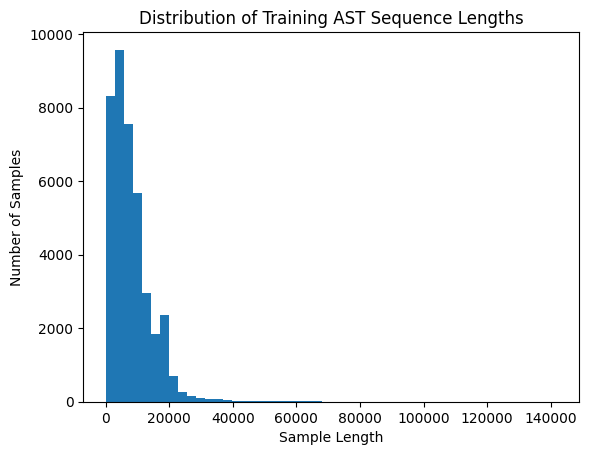

In [15]:
import matplotlib.pyplot as plt

sequence_lengths_train = filtered_tdf['processed_sequence'].apply(lambda x: len(x.split())).tolist()

# Plot the histogram
plt.hist(sequence_lengths_train, bins=50)
plt.xlabel('Sample Length')
plt.ylabel('Number of Samples')
plt.title('Distribution of Training AST Sequence Lengths')
# plt.savefig('/content/drive/MyDrive/Practicum/Docs/validation_opcode_lengths.png')
plt.show()

In [18]:
# Count how many samples have a sequence length less than 20000
count = len([length for length in sequence_lengths_train if length < 21000])

print("Number of samples with sequence length less than 20000:", count)

Number of samples with sequence length less than 20000: 38598


In [19]:
blank_sequence_rows = filtered_tdf[filtered_tdf['processed_sequence'].apply(lambda x: x == "")]

# 'blank_sequence_rows' now contains all rows with blank strings in the 'processed_sequence' column
print(blank_sequence_rows)

Empty DataFrame
Columns: [processed_sequence, labels]
Index: []


In [20]:
from keras.utils import pad_sequences
import pandas as pd
from keras.preprocessing.text import Tokenizer

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Tokenize the opcode sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_tdf['processed_sequence'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pickle

# Save the tokenizer to a file
tokenizer_filename = '/content/drive/MyDrive/Practicum/Utils/tokenizer_ast_train.pkl'
with open(tokenizer_filename, 'wb') as file:
    pickle.dump(tokenizer, file)

In [26]:
print(filtered_tdf.shape)

(39973, 2)


In [61]:
duplicates = filtered_tdf.duplicated()
print(duplicates[34])
print(filtered_tdf[duplicates])

# s = str(filtered_tdf.iloc[34]['processed_sequence'])
# print(s)
# print(filtered_tdf.iloc[34]['labels'])

# for index, row in filtered_tdf.iterrows():
#     if row['processed_sequence'] == s:
#         print(f"Found string in row {index}:")
#         print(row)

# mask = filtered_tdf["processed_sequence"].str.contains(s)
# print(filtered_tdf[mask])

34     True
34    False
34    False
34    False
34    False
34    False
34    False
34    False
34     True
34    False
34     True
dtype: bool
                                     processed_sequence  labels
34    type FunctionDefinition name XX parameters typ...  [5, 1]
46    type FunctionDefinition name XX parameters typ...     [4]
49    type FunctionDefinition name XX parameters typ...     [4]
51    type FunctionDefinition name XX parameters typ...     [4]
58    type FunctionDefinition name XX parameters typ...     [4]
...                                                 ...     ...
3967  type FunctionDefinition name XX parameters typ...     [4]
3975  type FunctionDefinition name XX parameters typ...  [3, 5]
3980  type FunctionDefinition name XX parameters typ...     [1]
3989  type FunctionDefinition name XX parameters typ...     [4]
3998  type FunctionDefinition name XX parameters typ...     [4]

[12171 rows x 2 columns]


In [33]:
print(filtered_tdf.iloc[34]['processed_sequence'])
print(filtered_tdf.iloc[49]['processed_sequence'])

type FunctionDefinition name XX parameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint name XX storageLocation None isStateVar False isIndexed False type Parameter typeName type ElementaryTypeName name uint name XX storageLocation None isStateVar False isIndexed False type Parameter typeName type ElementaryTypeName name uint name XX storageLocation None isStateVar False isIndexed False returnParameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint name XX storageLocation None isStateVar False isIndexed False body empty_list visibility external modifiers empty_list isConstructor False isFallback False isReceive False stateMutability view type FunctionDefinition name XX parameters type ParameterList parameters type Parameter typeName type ElementaryTypeName name uint name XX storageLocation None isStateVar False isIndexed False type Parameter typeName type ElementaryTypeName name uint name XX storageLoc

In [34]:
print(filtered_tdf.index.duplicated())

[False False False ...  True  True  True]


In [25]:
train_sequences = tokenizer.texts_to_sequences(filtered_tdf['processed_sequence'])

# Pad the sequences to a fixed length
max_sequence_length = 21000

train_data = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
# Save the vectorized datasets as new CSV files
train_vectorized_df = pd.DataFrame(train_data)
train_vectorized_df['labels'] = filtered_tdf['labels']
print(train_vectorized_df.shape)
# train_vectorized_df.to_csv('/content/drive/MyDrive/Training_Vectorized.csv', index=False)

<ipython-input-25-32f582359f27>:9: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  train_vectorized_df['labels'] = filtered_tdf['labels']


ValueError: ignored

In [22]:
space = False
if ' ' in tokenizer.word_index:
    space = True

print(space)

vocabulary_size = len(tokenizer.word_index)
print("Vocabulary size:", vocabulary_size)

False
Vocabulary size: 56172


In [ ]:
vocab = tokenizer.word_index
count = 0

for word, index in vocab.items():
    print(f'{word}: {index}')
    count += 1
    if count == 100:
        break

In [20]:
# def parse_solidity_code(source_code):
#     try:
#         ast = parser.parse(source_code)
#         return ast
#     except Exception as e:
#         print("Error parsing Solidity code:", e)
#         return None

# Set of Solidity keywords
solidity_keywords = [
    # Variable Types
    'address', 'bool', 'int', 'int8', 'int16', 'int32', 'int64', 'int128', 'int256', 'uint', 'uint8', 'uint16', 'uint32', 'uint64', 'uint128', 'uint256',
    'float', 'double', 'fixed', 'ufixed', 'byte', 'bytes', 'bytes1', 'bytes2', 'bytes4', 'bytes8', 'bytes16', 'bytes32', 'string', 'mapping', 'struct', 'enum',

    # Control Structures
    'if', 'else', 'while', 'do', 'for', 'switch', 'case', 'default', 'break', 'continue', 'return',
    'throw', 'require', 'revert', 'modifier',

    # Visibility Specifiers
    'public', 'external', 'internal', 'private',

    # Function Modifiers
    'pure', 'view', 'payable', 'constant', 'anonymous'

    # Special Keywords
    'this', 'super', 'selfdestruct', 'assembly',

    # Events
    'event', 'indexed',

    # Built-in Functions
    'msg', 'msg.sender', 'msg.value', 'now', 'block', 'tx', 'gasleft', 'assert', 'require', 'revert',
    'keccak256', 'sha256', 'ecrecover', 'addmod', 'mulmod', 'create', 'call', 'delegatecall',
    'staticcall', 'selfdestruct', 'balance', 'div', 'mod', 'exp', 'sqrt',

    # Other
    'constructor', 'fallback', 'receive', 'pragma', 'after', 'alias', 'apply', 'auto', 'case', 'copyof', 'default', 'defined', 'final', 'implements', 'in', 'inline', 'let',
    'macro', 'match', 'mutable', 'null', 'of', 'partial', 'promise', 'reference', 'relocatable', 'sealed', 'sizeof', 'static', 'supports', 'switch', 'typedef', 'typeof', 'var'
]

def get_function_nodes(ast):
    function_nodes = []

    def traverse(node):
        if isinstance(node, dict):
            if 'type' in node and node['type'] == 'FunctionDefinition' or node['type'] == 'ModifierDefinition':
                function_nodes.append(node)
            for key, value in node.items():
                if isinstance(value, list):
                    for item in value:
                        traverse(item)
                elif isinstance(value, dict):
                    traverse(value)

    traverse(ast)
    return function_nodes

def serialize_function_node(node, keywords):
    serialized_node = []
    has_string_literal_type = False

    for key, value in node.items():
        if key == 'name' and value not in keywords:
            value = 'XX'
        elif key == 'namePath':
            value = 'XX'
        elif key == 'decl':
            value = 'parser_error'
        elif key == 'type' and value == 'stringLiteral':
            has_string_literal_type = True
        elif key == 'value' and has_string_literal_type:
            value = 'string_literal'
            has_string_literal_type = False

        if isinstance(value, list):
            if not value:
                serialized_value = 'empty_list'
            else:
                serialized_value = ' '.join(serialize_function_node(item, keywords) for item in value if isinstance(item, dict))
        elif isinstance(value, dict):
            serialized_value = serialize_function_node(value, keywords)
        else:
            serialized_value = str(value)
        serialized_node.append(f'{key} {serialized_value}')
    return ' '.join(serialized_node)

def serialize_ast(ast, solidity_keywords):

    function_nodes = get_function_nodes(ast)
    serialized_ast = [serialize_function_node(node, solidity_keywords) for node in function_nodes]
    return ' '.join(serialized_ast)


def preprocessDataframe(df, startIndex, rowCount, output_path):
    processed_sequences = []
    for i in range(startIndex, startIndex+rowCount):
        # Step 1: Parse the source code
        ast = parse_solidity_code(df.iloc[i]['source_code'])

        # Step 2: Serialize the AST
        try:
            serialized_ast = serialize_ast(ast, solidity_keywords)
        except Exception as e:
            print("Error serializing AST: ", e)
            serialized_ast = "unserializable"

        processed_sequences.append(serialized_ast)

        # Print progress after every 1000 rows
        if (i - startIndex + 1) % 500 == 0:
            print(f"{i - startIndex + 1} rows processed")

    # Create a new DataFrame with the processed sequences and 'slither' column
    processed_df = pd.DataFrame({'processed_sequence': processed_sequences,
                                 'labels': df['slither'].iloc[startIndex:startIndex + rowCount]})

    # Save the new DataFrame to a CSV file
    processed_df.to_csv(output_path, index=False)

# csvIndex = 0
# startIndex = 0
# rowCount = 4000
# training_output_path = f'/content/drive/MyDrive/Practicum/ASTDataPP/training_ast_sequences_{csvIndex}.csv'
# preprocessDataframe(train_df, startIndex, rowCount, training_output_path)

# tdf = pd.read_csv(training_output_path)
# print(f"processed_df shape: {tdf.shape}")



# # Step 1: Parse the source code
# ast = parse_solidity_code(val_df.iloc[0][0])

# # pprint.pprint(ast, width=10000, sort_dicts=False)

# # function_nodes = get_function_nodes(ast)
# # for node in function_nodes:
# #     print(node)

# # Step 2: Serialize the AST
# serialized_ast = serialize_ast(ast, solidity_keywords)
# print(len(serialized_ast))
# print(serialized_ast)

In [49]:
tdf = pd.read_csv(training_output_path)
print(tdf.head(5))
print(len(tdf.iloc[1][0]))

                                  processed_sequence     labels
0  type FunctionDefinition name XX parameters typ...        [1]
1  type FunctionDefinition name XX parameters typ...  [1, 3, 2]
109614


In [1]:
!apt-get install -y -qq git
!git clone https://github.com/ConsenSys/python-solidity-parser.git
%ls
%cd python-solidity-parser
%ls
!pip install .
from solidity_parser import parser

import sys
import pprint

def parse_solidity_code(source_code):
    try:
        ast = parser.parse(source_code)
        return ast
    except Exception as e:
        print(f"Error parsing Solidity code: {e}",)
        return None

import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/MyDrive/Practicum/SascDatasets/train_data_source_codes.csv')

# Set of Solidity keywords
solidity_keywords = [
    # Variable Types
    'address', 'bool', 'int', 'int8', 'int16', 'int32', 'int64', 'int128', 'int256', 'uint', 'uint8', 'uint16', 'uint32', 'uint64', 'uint128', 'uint256',
    'float', 'double', 'fixed', 'ufixed', 'byte', 'bytes', 'bytes1', 'bytes2', 'bytes4', 'bytes8', 'bytes16', 'bytes32', 'string', 'mapping', 'struct', 'enum',

    # Control Structures
    'if', 'else', 'while', 'do', 'for', 'switch', 'case', 'default', 'break', 'continue', 'return',
    'throw', 'require', 'revert', 'modifier',

    # Visibility Specifiers
    'public', 'external', 'internal', 'private',

    # Function Modifiers
    'pure', 'view', 'payable', 'constant', 'anonymous'

    # Special Keywords
    'this', 'super', 'selfdestruct', 'assembly',

    # Events
    'event', 'indexed',

    # Built-in Functions
    'msg', 'msg.sender', 'msg.value', 'sender', 'value', 'now', 'block', 'tx', 'origin', 'gasleft', 'assert', 'require', 'revert',
    'keccak256', 'sha256', 'ecrecover', 'addmod', 'mulmod', 'create', 'call', 'delegatecall', 'callcode', 'send',
    'staticcall', 'selfdestruct', 'balance', 'div', 'mod', 'exp', 'sqrt', 'gas', 'this', 'abs', 'min', 'max',
    'balance', 'transfer', 'block', 'number', 'blockHash', 'timestamp',

    # Other
    'constructor', 'fallback', 'receive', 'pragma', 'after', 'alias', 'apply', 'auto', 'case', 'copyof', 'default', 'defined', 'final', 'implements', 'in', 'inline', 'let',
    'macro', 'match', 'mutable', 'null', 'of', 'partial', 'promise', 'reference', 'relocatable', 'sealed', 'sizeof', 'static', 'supports', 'switch', 'typedef', 'typeof', 'var'
]

def get_function_nodes(ast):
    function_nodes = []

    def traverse(node):
        if isinstance(node, dict):
            if 'type' in node and node['type'] == 'FunctionDefinition':
                function_nodes.append(node)
            elif 'type' in node and node['type'] == 'ModifierDefinition':
                function_nodes.append(node)
            for key, value in node.items():
                if isinstance(value, list):
                    for item in value:
                        traverse(item)
                elif isinstance(value, dict):
                    traverse(value)

    traverse(ast)
    return function_nodes

def serialize_function_node(node, keywords):
    serialized_node = []
    has_string_literal_type = False
    has_hex_literal_type = False
    has_hex_number_type = False
    has_decimal_number_type = False

    for key, value in node.items():
        if key == 'name' and value not in keywords:
            value = 'XX'
        elif key == 'namePath' and value not in keywords:
            value = 'XX'
        elif key == 'memberName' and value not in keywords:
            value = 'XX'
        # elif key == 'functionName' and value not in keywords:
        #     value = 'assembly_func'
        elif key == 'decl':
            value = 'parser_error'
        elif key == 'number':
            value = 'num_literal'
        elif key == 'type' and value == 'stringLiteral':
            has_string_literal_type = True
        elif key == 'type' and value == 'hexLiteral':
            has_hex_literal_type = True
        elif key == 'type' and value == 'HexNumber':
            has_hex_number_type = True
        elif key == 'type' and value == 'DecimalNumber':
            has_decimal_number_type = True
        elif key == 'value' and has_string_literal_type:
            value = 'string_literal'
            has_string_literal_type = False
        elif key == 'value' and has_hex_literal_type:
            value = 'hex_literal'
            has_hex_literal_type = False
        elif key == 'value' and has_hex_number_type:
            value = 'hex_value'
            has_hex_number_type = False
        elif key == 'value' and has_decimal_number_type:
            value = 'dec_value'
            has_decimal_number_type = False

        if isinstance(value, list):
            if not value:
                serialized_value = 'empty_list'
            else:
                serialized_value = ' '.join(serialize_function_node(item, keywords) for item in value if isinstance(item, dict))
        elif isinstance(value, dict):
            serialized_value = serialize_function_node(value, keywords)
        else:
            serialized_value = str(value)
        serialized_node.append(f'{key} {serialized_value}')
    return ' '.join(serialized_node)

def serialize_ast(ast, solidity_keywords):

    function_nodes = get_function_nodes(ast)
    serialized_ast = [serialize_function_node(node, solidity_keywords) for node in function_nodes]
    return ' '.join(serialized_ast)


def preprocessDataframe(df, startIndex, rowCount, output_path):
    processed_sequences = []
    for i in range(startIndex, startIndex+rowCount):
        # Step 1: Parse the source code
        ast = parse_solidity_code(df.iloc[i]['source_code'])

        # Step 2: Serialize the AST
        try:
            serialized_ast = serialize_ast(ast, solidity_keywords)
        except Exception as e:
            print("Error serializing AST: ", e)
            serialized_ast = "unserializable"

        processed_sequences.append(serialized_ast)

        # Print progress after every 1000 rows
        if (i - startIndex + 1) % 500 == 0:
            print(f"{i - startIndex + 1} rows processed")

    # Create a new DataFrame with the processed sequences and 'slither' column
    processed_df = pd.DataFrame({'processed_sequence': processed_sequences,
                                 'labels': df['slither'].iloc[startIndex:startIndex + rowCount]})

    # Save the new DataFrame to a CSV file
    processed_df.to_csv(output_path, index=False)

csvIndex = 0
startIndex = 0
rowCount = 15000
training_output_path = f'/content/drive/MyDrive/Practicum/ASTDataChunked/training_ast_sequences_{csvIndex}.csv'
preprocessDataframe(train_df, startIndex, rowCount, training_output_path)

Cloning into 'python-solidity-parser'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 198 (delta 55), reused 49 (delta 49), pack-reused 138
Receiving objects: 100% (198/198), 270.51 KiB | 19.32 MiB/s, done.
Resolving deltas: 100% (103/103), done.
python-solidity-parser/  sample_data/
/content/python-solidity-parser
README.md         samples/  setup.py          solidity_parser/
requirements.txt  scripts/  solidity-antlr4/
Processing /content/python-solidity-parser
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for solidity-parser: filename=solidity_parser-0.1.1-py3-none-any.whl size=67337 sha256=3a833bb12b614e6ec8429d02996c547972b7827d27444f66d56a2dc6edfed531
  Stored in directory: /root/.cache/pip/wheels/6c/04/a4/9bab35dd96f0494763c278dbe3f664d449e5f5987

line 807:5 missing 'constant' at 'SafeMath'
line 807:14 mismatched input 'for' expecting '='
line 807:25 mismatched input ';' expecting 'constant'
line 811:12 mismatched input 'public' expecting 'constant'
line 811:23 mismatched input ';' expecting 'constant'
line 813:12 mismatched input 'public' expecting 'constant'
line 813:29 mismatched input ';' expecting 'constant'
line 815:30 mismatched input 'public' expecting 'constant'
line 815:43 mismatched input ';' expecting 'constant'
line 817:14 mismatched input 'public' expecting 'constant'
line 817:30 mismatched input ';' expecting 'constant'
line 821:21 mismatched input '(' expecting 'constant'
line 821:30 missing 'constant' at 'newRoot'
line 821:37 mismatched input ')' expecting '='
line 823:27 mismatched input '(' expecting 'constant'
line 823:36 missing 'constant' at 'newSuperOwner'
line 823:49 mismatched input ')' expecting '='
line 825:23 mismatched input '(' expecting 'constant'
line 825:32 missing 'constant' at 'newOwner'
line 8

Error parsing Solidity code: 'NoneType' object has no attribute 'getText'


line 1140:1 missing 'constant' at 'SExactGauge'
line 1140:13 mismatched input 'is' expecting '='
line 1140:30 mismatched input ',' expecting 'constant'
line 1140:45 mismatched input '{' expecting 'constant'
line 1143:19 mismatched input 'for' expecting 'constant'
line 1143:27 mismatched input ';' expecting 'constant'
line 1146:25 mismatched input 'for' expecting 'constant'
line 1146:36 mismatched input ';' expecting 'constant'
line 1152:12 extraneous input 'internal' expecting 'constant'
line 1155:12 extraneous input 'internal' expecting 'constant'
line 1158:12 extraneous input 'internal' expecting 'constant'
line 1161:12 extraneous input 'internal' expecting 'constant'
line 1164:12 extraneous input 'internal' expecting 'constant'
line 1170:12 mismatched input 'override' expecting 'constant'
line 1170:34 mismatched input ';' expecting 'constant'
line 1173:12 mismatched input 'override' expecting 'constant'
line 1173:37 mismatched input ';' expecting 'constant'
line 1176:12 mismatched i

Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 1140:1 missing 'constant' at 'SExactGauge'
line 1140:13 mismatched input 'is' expecting '='
line 1140:30 mismatched input ',' expecting 'constant'
line 1140:45 mismatched input '{' expecting 'constant'
line 1143:19 mismatched input 'for' expecting 'constant'
line 1143:27 mismatched input ';' expecting 'constant'
line 1146:25 mismatched input 'for' expecting 'constant'
line 1146:36 mismatched input ';' expecting 'constant'
line 1152:12 extraneous input 'internal' expecting 'constant'
line 1155:12 extraneous input 'internal' expecting 'constant'
line 1158:12 extraneous input 'internal' expecting 'constant'
line 1161:12 extraneous input 'internal' expecting 'constant'
line 1167:12 mismatched input 'override' expecting 'constant'
line 1167:34 mismatched input ';' expecting 'constant'
line 1170:12 mismatched input 'override' expecting 'constant'
line 1170:37 mismatched input ';' expecting 'constant'
line 1173:12 mismatched input 'override' expecting 'constant'
line 1173:36 mismatched i

Error parsing Solidity code: 'NoneType' object has no attribute 'getText'


line 3137:7 missing 'constant' at 'BondedSortitionPool'
line 3137:27 mismatched input 'is' expecting '='
line 3137:52 mismatched input '{' expecting 'constant'
line 3139:21 mismatched input 'for' expecting 'constant'
line 3139:47 mismatched input ';' expecting 'constant'
line 3141:21 mismatched input 'for' expecting 'constant'
line 3141:50 mismatched input ';' expecting 'constant'
line 3143:12 mismatched input 'for' expecting 'constant'
line 3143:25 mismatched input ';' expecting 'constant'
line 3181:13 missing 'constant' at 'poolParams'
line 3181:23 mismatched input ';' expecting '='
line 3539:0 extraneous input '}' expecting {<EOF>, 'pragma', 'import', 'from', 'abstract', 'contract', 'interface', 'library', 'error', 'struct', 'function', 'enum', 'address', 'mapping', 'calldata', 'revert', 'var', 'bool', 'string', 'byte', 'callback', Int, Uint, Byte, Fixed, Ufixed, 'leave', 'payable', 'type', 'constructor', 'fallback', 'receive', Identifier}
line 3145:7 missing 'constant' at 'BondedSo

Error parsing Solidity code: 'list' object has no attribute 'getText'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
1000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
1500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 482:11 no viable alternative at input 'functionfallback'
line 490:4 extraneous input 'fallback' expecting {'~', 'from', '{', '}', '(', 'error', 'for', 'function', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'receive', Identifier, StringLiteralFragment}
line 774:11 no viable alternative at input 'functionfallback'


Error parsing Solidity code: 'NoneType' object is not subscriptable


line 51:81 mismatched input 'true' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'leave', 'payable', 'constructor', 'receive', Identifier}
line 51:87 mismatched input '}' expecting ':='


Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
2000 rows processed


line 374:21 extraneous input 'gwei' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 522:56 no viable alternative at input '((bbdToken.balanceOf(feeAccount)*gweiBBDPriceInWei)/gwei'
line 522:56 mismatched input 'gwei' expecting {'~', 'from', '(', 'error', '[', 'address', 'calldata', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'leave', 'payable', 'type', 'constructor', 'receive', Identifier, StringLiteralFragment}
line 615:63 no viable alternative at input '((uint(_flows[flowIndex])*gweiBBDPriceInWei)/gwei'
line 615:63 mismatched input 'gwei' expecting {'~', 'from', '(', 'error', '[', 'address', 'calldata', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', '

Error parsing Solidity code: object of type 'NoneType' has no len()
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 166:14 extraneous input ',' expecting {'from', '{', '}', '(', 'error', 'for', 'function', 'address', 'calldata', 'if', 'assembly', 'return', 'revert', 'byte', 'let', '=:', 'switch', 'callback', DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'constructor', 'receive', Identifier, StringLiteralFragment}
line 166:18 extraneous input ',' expecting {<EOF>, 'pragma', '~', 'import', 'from', '{', '}', 'abstract', 'contract', 'interface', 'library', '(', 'error', 'using', 'for', 'struct', 'modifier', 'function', 'event', 'enum', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'let', '=:', 'switch', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'fallback', 'receive',

Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
2500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
3000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
3500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 284:13 no viable alternative at input 'functionemit'
line 284:32 mismatched input ')' expecting {';', '='}
line 284:44 mismatched input 'returns' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 284:57 mismatched input ')' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 287:14 extraneous input '(' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 287:27 mismatched input '+' expecting {';', '='}
line 287:36 extraneous input '>=' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'paya

Error parsing Solidity code: 'NoneType' object is not subscriptable
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
4000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 72:81 mismatched input 'true' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'leave', 'payable', 'constructor', 'receive', Identifier}
line 72:87 mismatched input '}' expecting ':='


Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
4500 rows processed


line 265:13 no viable alternative at input 'functionemit'
line 265:32 mismatched input ')' expecting {';', '='}
line 265:44 mismatched input 'returns' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 265:57 mismatched input ')' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 268:14 extraneous input '(' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 268:27 mismatched input '+' expecting {';', '='}
line 268:36 extraneous input '>=' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'paya

Error parsing Solidity code: 'NoneType' object is not subscriptable
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 651:11 no viable alternative at input 'functionfallback'
line 659:4 extraneous input 'fallback' expecting {'~', 'from', '{', '}', '(', 'error', 'for', 'function', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'receive', Identifier, StringLiteralFragment}


Error parsing Solidity code: 'NoneType' object is not subscriptable
5000 rows processed


line 72:81 mismatched input 'true' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'leave', 'payable', 'constructor', 'receive', Identifier}
line 72:87 mismatched input '}' expecting ':='


Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'list' object has no attribute 'getText'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
5500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 644:14 extraneous input ',' expecting {<EOF>, 'pragma', '~', 'import', 'from', '{', '}', 'abstract', 'contract', 'interface', 'library', '(', 'error', 'using', 'for', 'struct', 'modifier', 'function', 'event', 'enum', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'let', '=:', 'switch', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'fallback', 'receive', Identifier, StringLiteralFragment}
line 644:18 extraneous input ',' expecting {<EOF>, 'pragma', '~', 'import', 'from', '{', '}', 'abstract', 'contract', 'interface', 'library', '(', 'error', 'using', 'for', 'struct', 'modifier', 'function', 'event', 'enum', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'd

6000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
6500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'list' object has no attribute 'getText'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
7000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
7500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Err

line 178:19 mismatched input 'fallback' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'leave', 'payable', 'constructor', 'receive', Identifier}
line 225:8 mismatched input 'fallback' expecting {'~', 'from', '{', '}', '(', 'error', 'for', 'function', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'receive', Identifier, StringLiteralFragment}
line 225:17 mismatched input '=' expecting '('
line 226:8 extraneous input 'return' expecting {<EOF>, 'pragma', 'import', 'from', '}', 'abstract', 'contract', 'interface', 'library', 'error', 'using', 'struct', 'modifier', 'function', 'event', 'enum', 'address', 'mapping', 'calldata', 'revert', 'var', 

Error parsing Solidity code: object of type 'NoneType' has no len()
8500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
9000 rows processed


line 2990:14 extraneous input ',' expecting {<EOF>, 'pragma', '~', 'import', 'from', '{', '}', 'abstract', 'contract', 'interface', 'library', '(', 'error', 'using', 'for', 'struct', 'modifier', 'function', 'event', 'enum', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'let', '=:', 'switch', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'fallback', 'receive', Identifier, StringLiteralFragment}
line 2990:18 extraneous input ',' expecting {<EOF>, 'pragma', '~', 'import', 'from', '{', '}', 'abstract', 'contract', 'interface', 'library', '(', 'error', 'using', 'for', 'struct', 'modifier', 'function', 'event', 'enum', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 

Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
9500 rows processed
Error parsing Solidity code: 'list' object has no attribute 'getText'
10000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'


line 537:48 mismatched input '.' expecting {';', '{', 'returns'}
line 537:62 extraneous input '{' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 542:23 mismatched input '(' expecting {';', '='}
line 542:39 extraneous input '(' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 542:54 mismatched input ')' expecting {';', '='}
line 542:64 mismatched input '(' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 543:36 extraneous input '{' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'paya

Error parsing Solidity code: 'NoneType' object has no attribute 'getText'
10500 rows processed


line 9:13 no viable alternative at input 'functionfallback'
line 43:13 no viable alternative at input 'functionfallback'
line 77:24 mismatched input 'fallback' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'leave', 'payable', 'constructor', 'receive', Identifier}
line 79:8 extraneous input 'if' expecting {<EOF>, 'pragma', 'import', 'from', '}', 'abstract', 'contract', 'interface', 'library', 'error', 'using', 'struct', 'modifier', 'function', 'event', 'enum', 'address', 'mapping', 'calldata', 'revert', 'var', 'bool', 'string', 'byte', 'callback', Int, Uint, Byte, Fixed, Ufixed, 'leave', 'payable', 'type', 'constructor', 'fallback', 'receive', Identifier}
line 79:16 mismatched input '==' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'override', 'constant', 'immutable', 'leave', 'internal', 'payable', 'private', 'public', 'constructor', 'receive', Identifier}
line 79:27 mismatched input '=' expecting {'from', 'error', 'calldata', 'revert', 'callback', 'ove

Error parsing Solidity code: 'NoneType' object is not subscriptable
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'list' object has no attribute 'getText'


line 480:11 no viable alternative at input 'functionfallback'
line 487:4 extraneous input 'fallback' expecting {'~', 'from', '{', '}', '(', 'error', 'for', 'function', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'receive', Identifier, StringLiteralFragment}
line 780:11 no viable alternative at input 'functionfallback'


Error parsing Solidity code: 'NoneType' object is not subscriptable
Error parsing Solidity code: 'list' object has no attribute 'getText'
11000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
11500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'list' object has no attribute 'getText'
12000 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
12500 rows processed
Error parsing S

line 2990:14 extraneous input ',' expecting {<EOF>, 'pragma', '~', 'import', 'from', '{', '}', 'abstract', 'contract', 'interface', 'library', '(', 'error', 'using', 'for', 'struct', 'modifier', 'function', 'event', 'enum', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 'do', 'return', 'throw', 'emit', 'revert', 'var', 'bool', 'string', 'byte', '++', '--', 'new', '+', '-', 'after', 'delete', '!', 'let', '=:', 'switch', 'callback', Int, Uint, Byte, Fixed, Ufixed, BooleanLiteral, DecimalNumber, HexNumber, HexLiteralFragment, 'break', 'continue', 'leave', 'payable', 'type', 'constructor', 'fallback', 'receive', Identifier, StringLiteralFragment}
line 2990:18 extraneous input ',' expecting {<EOF>, 'pragma', '~', 'import', 'from', '{', '}', 'abstract', 'contract', 'interface', 'library', '(', 'error', 'using', 'for', 'struct', 'modifier', 'function', 'event', 'enum', '[', 'address', 'mapping', 'calldata', 'if', 'try', 'while', 'unchecked', 'assembly', 

Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
14500 rows processed
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'NoneType' object has no attribute 'identifier'
Error parsing Solidity code: 'list' object has no attribute 'getText'
15000 rows processed
